
# 2. Gradient Descent (Learning Rate Scheduler)

- In this implementation, we refine our first implementation by using the Learning Rate Scheduling
- It simply increases the learning rate as the number of epochs increases
- This is done because the gradients get smaller as the number of epochs increases, so we need to increase the learning rate to compensate for this to ensure that the model converges (updates the weights) in a reasonable amount of time
---

In [86]:
import numpy as np
from matplotlib import pyplot as plt
from prettytable import PrettyTable

np.random.seed(42)

In [87]:
def show_history(history: dict):
    """
    Display the training history in a tabular format.

    Args:
        history (dict): A dictionary containing the training history with keys as column names and values as lists of data points.
    """
    # Create a PrettyTable object to display the history
    table = PrettyTable()

    # Add each key and its corresponding values as a column in the table
    for key in history.keys():
        table.add_column(key, history[key])

    # Print the table
    print(table)

In [88]:
MAX_EPOCHS = 150 * 3
MAX_LOSS = 0.01

# Set target values for k and b
TARGET_K = np.random.randint(-10, 10)
TARGET_B = np.random.randint(-10, 10)

# Generate sample data
X = np.linspace(-100, 100, 200)
X = (X - np.mean(X)) / np.std(X)  # Normalize the data
# X - mean(X) simply sets the mean of X to 0
# X / std(X) simply sets the standard deviation of X to 1

y = TARGET_K * X + TARGET_B + np.random.normal(0, 1, len(X))

# Shuffle the data
indices = np.arange(len(X))
np.random.shuffle(indices)

X = X[indices]
y = y[indices]


# Split the data into training and testing sets
# 80% of the data will be used for training and 20% for testing
split = 0.8
split = int(split * len(X))

X_train = X[:split]
X_test = X[split:]

y_train = y[:split]
y_test = y[split:]

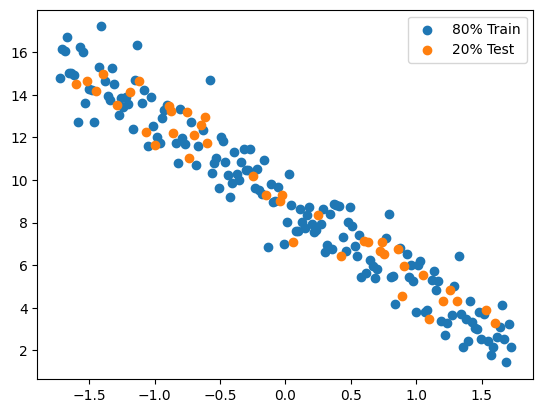

In [89]:
plt.scatter(X_train, y_train, label='80% Train')
plt.scatter(X_test, y_test, label='20% Test')
plt.legend()
plt.show()

In [90]:
# Initialize history dictionary to store training data
history = {
    "epoch": [],
    "loss": [],
    "k": [],
    "b": [],
    "k_gradient": [],
    "k_lr": [],
    "b_gradient": [],
    "b_lr": [],
}


# Initialize k and b with random values greater than 0
k = np.random.rand() + 0.01
b = np.random.rand() + 0.01

# Set initial learning rates for k and b
k_lr = 0.001
b_lr = 0.001

In [91]:
class LRScheduler:
    def __init__(self, param, lr, decay_rate=0.01):
        self.param = param
        self.lr = lr

    def step(self, gradeint, epoch):
        self.param -= self.lr * gradeint
        self.lr = self.lr * (1 + 0.01)

    def get_param(self):
        return self.param

In [92]:
kOptimizer = LRScheduler(param=k, lr=k_lr)
bOptimizer = LRScheduler(param=b, lr=b_lr)

In [93]:
epoch = 0

while True:
    # Predict y values using the current values of k and b
    k = kOptimizer.get_param()
    b = bOptimizer.get_param()

    y_pred = k * X_train + b

    # Calculate the errors
    errors = y_pred - y_train

    # Calculate the loss
    loss = np.mean(np.abs(errors))

    if loss <= MAX_LOSS or epoch >= MAX_EPOCHS:
        print("The training finished..")
        print(f"Epochs: {epoch}")
        print(f"Loss: {loss:.4f}")
        print(f"Variable `k`: {k:.2f}")
        print(f"Variable `b`: {b:.2f}")
        break

    # Calculate the gradients for k and b (MSE loss function)
    k_gradient = (2 / len(X_train)) * np.sum(errors * X_train)
    b_gradient = (2 / len(X_train)) * np.sum(errors)

    # # Update k and b using the gradients and learning rates
    kOptimizer.step(k_gradient, epoch)
    bOptimizer.step(b_gradient, epoch)

    # Store the current epoch's data in the history dictionary
    history["epoch"].append(epoch)
    history["k"].append(k)
    history["b"].append(b)
    history["loss"].append(loss)
    history["k_gradient"].append(k_gradient)
    history["k_lr"].append(k_lr)
    history["b_gradient"].append(b_gradient)
    history["b_lr"].append(b_lr)

    epoch += 1

The training finished..
Epochs: 450
Loss: 0.8027
Variable `k`: -3.89
Variable `b`: 9.02


In [94]:
k = kOptimizer.get_param()
b = bOptimizer.get_param()

test_pred = k * X_test + b
test_loss = np.mean(np.abs(test_pred - y_test))
print(f"Test loss: {test_loss:.4f}")

Test loss: 0.6844


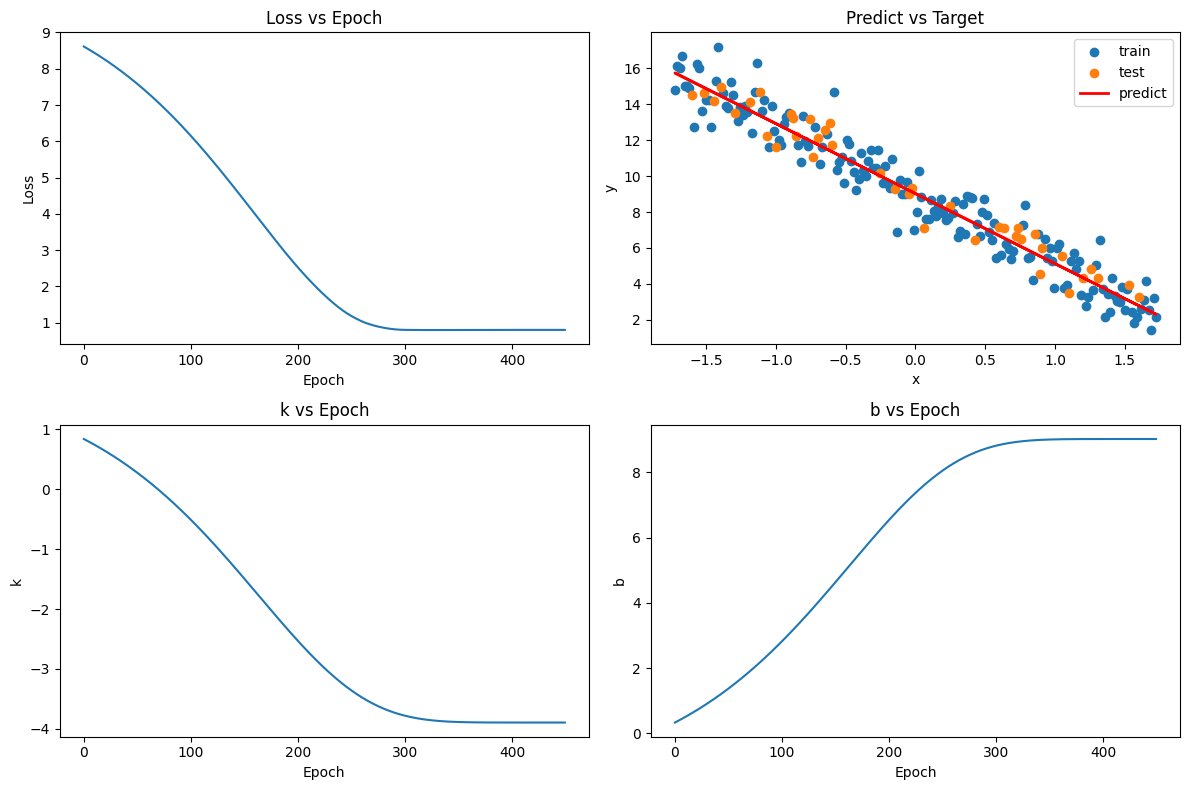

In [95]:
# 1st plot - loss vs epoch
# 2nd plot - predict vs target
# 3rd plot - k vs epoch
# 4th plot - b vs epoch

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0, 0].plot(history["epoch"], history["loss"])
ax[0, 0].set_title("Loss vs Epoch")
ax[0, 0].set_xlabel("Epoch")
ax[0, 0].set_ylabel("Loss")

ax[0, 1].scatter(X_train, y_train, label="train")
ax[0, 1].scatter(X_test, y_test, label="test")
ax[0, 1].plot(X, k * X + b, label="predict", color="red", linewidth=2)
ax[0, 1].set_xlabel("x")
ax[0, 1].set_ylabel("y")
ax[0, 1].legend()
ax[0, 1].set_title("Predict vs Target")


ax[1, 0].plot(history["epoch"], history["k"])
ax[1, 0].set_title("k vs Epoch")
ax[1, 0].set_xlabel("Epoch")
ax[1, 0].set_ylabel("k")

ax[1, 1].plot(history["epoch"], history["b"])
ax[1, 1].set_title("b vs Epoch")
ax[1, 1].set_xlabel("Epoch")
ax[1, 1].set_ylabel("b")

plt.tight_layout()
plt.show()
